In [1]:
!hostname

samuel


<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#K-Means-Clustering" data-toc-modified-id="K-Means-Clustering-1">K-Means Clustering</a></span><ul class="toc-item"><li><span><a href="#Old-Faithful-Dataset" data-toc-modified-id="Old-Faithful-Dataset-1.1">Old Faithful Dataset</a></span></li><li><span><a href="#MNIST-Dataset" data-toc-modified-id="MNIST-Dataset-1.2">MNIST Dataset</a></span></li></ul></li><li><span><a href="#K-Nearest-Neighbor-Classification" data-toc-modified-id="K-Nearest-Neighbor-Classification-2">K-Nearest-Neighbor Classification</a></span><ul class="toc-item"><li><span><a href="#Comparison-to-Neural-Network-Classifier" data-toc-modified-id="Comparison-to-Neural-Network-Classifier-2.1">Comparison to Neural Network Classifier</a></span></li></ul></li></ul></div>

# K-Means Clustering

So far this semester we have been working with *supervised*  and *reinforcement* learning algorithms. Another family of machine learning algorithms are *unsupervised* learning algorithms.  These are algorithms designed to find patterns or groupings in a data set.  No targets, or desired outputs, are involved.

## Old Faithful Dataset

For example, take a look at this data set of eruption durations and the waiting times in between [eruptions of the Old Faithful Geyser](https://www.kaggle.com/janithwanni/old-faithful) in Yellowstone National Park.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
!head faithful.csv

"","eruptions","waiting"
"1",3.6,79
"2",1.8,54
"3",3.333,74
"4",2.283,62
"5",4.533,85
"6",2.883,55
"7",4.7,88
"8",3.6,85
"9",1.95,51


In [4]:
datadf = pd.read_csv('faithful.csv', usecols=(1, 2))
datadf

,eruptions,waiting
0,3.600,79
1,1.800,54
2,3.333,74
3,2.283,62
4,4.533,85
...,...,...
267,4.117,81
268,2.150,46
269,4.417,90
270,1.817,46


In [5]:
data = datadf.values
data = np.array(data)
type(data), data[:10]

(numpy.ndarray,
 array([[ 3.6  , 79.   ],
        [ 1.8  , 54.   ],
        [ 3.333, 74.   ],
        [ 2.283, 62.   ],
        [ 4.533, 85.   ],
        [ 2.883, 55.   ],
        [ 4.7  , 88.   ],
        [ 3.6  , 85.   ],
        [ 1.95 , 51.   ],
        [ 4.35 , 85.   ]]))

Text(0, 0.5, 'interval')

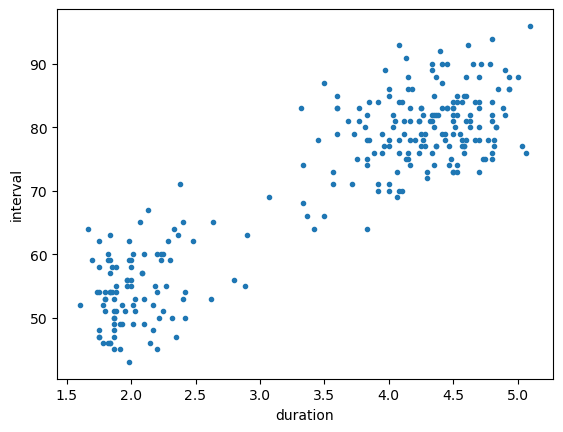

In [6]:
plt.plot(data[:, 0], data[:, 1], '.')
plt.xlabel('duration')
plt.ylabel('interval')

We can clearly see two clusters here.  For higher dimensional data, we cannot directly visualize the data to see the clusters.  We need a mathematical way to detect clusters. This gives rise to the class of unsupervised learning methods called *clustering* algorithms.

A simple example of a clustering algorithm is the *k-means* algorithm.  It results in identifying $k$ cluster centers.  It is an iterative algorithm that starts with an initial assignment of $k$ centers.  Then it proceeds by determining which centers each data sample is closest to and adjusts the centers to be the means of each of these data partitions.  It then repeats.

Let's develop this algorithm one step at a time.

Each sample is the Old Faithful data has 2 attributes, so each sample is in 2-dimensional space.  We know by looking at the above plot that our data nicely falls in two clusters, so we will start with $k=2$.  We will initialize the two cluster centers by randomly choosing two of the data samples.

In [10]:
n_samples = data.shape[0]
np.random.choice(range(n_samples), 2, replace=False)

array([111, 234])

In [12]:
centers = data[np.random.choice(range(n_samples), 2, replace=False), :]
centers

array([[ 1.867, 48.   ],
       [ 4.9  , 82.   ]])

Now we must find all samples that are closest to the first center, and those that are closest to the second sample.

In [13]:
a = np.array([1, 2, 3])
b = np.array([10, 20, 30])
a, b

(array([1, 2, 3]), array([10, 20, 30]))

In [14]:
a - b

array([ -9, -18, -27])

But what if we want to subtract every element of `a` with every element of `b`?

In [15]:
np.resize(a, (3, 3))

array([[1, 2, 3],
       [1, 2, 3],
       [1, 2, 3]])

In [16]:
np.resize(b, (3, 3))

array([[10, 20, 30],
       [10, 20, 30],
       [10, 20, 30]])

In [17]:
np.resize(a, (3, 3)).T

array([[1, 1, 1],
       [2, 2, 2],
       [3, 3, 3]])

In [18]:
np.resize(a, (3, 3)).T - np.resize(b, (3, 3))

array([[ -9, -19, -29],
       [ -8, -18, -28],
       [ -7, -17, -27]])

However, we can ask numpy to do this duplication for us if we reshape `a` to be a column vector and leave `b` as a row vector.

$$ \begin{pmatrix}
1\\
2\\
3
\end{pmatrix}
-
\begin{pmatrix}
10 & 20 & 30
\end{pmatrix}
\;\; = \;\;
\begin{pmatrix}
1 & 1 & 1\\
2 & 2 & 2\\
3 & 3 & 3
\end{pmatrix}
-
\begin{pmatrix}
10 & 20 & 30\\
10 & 20 & 30\\
10 & 20 & 30
\end{pmatrix}
$$

In [19]:
a[:, np.newaxis]

array([[1],
       [2],
       [3]])

In [20]:
a[:, np.newaxis] - b

array([[ -9, -19, -29],
       [ -8, -18, -28],
       [ -7, -17, -27]])

Now imagine that `a` is a cluster center and `b` contains data samples, one per row.  The first step of calculating the distance from `a` to all samples in `b` is to subtract them component-wise.

In [21]:
a = np.array([1, 2, 3])
b = np.array([[10, 20, 30], [40, 50, 60]])
print(a)
print(b)

[1 2 3]
[[10 20 30]
 [40 50 60]]


In [22]:
b - a

array([[ 9, 18, 27],
       [39, 48, 57]])

The single row vector `a` is duplicated for as many rows as there are in `b`!  We can use this to calculate the squared distance between a center and every sample.

In [23]:
centers[0, :]

array([ 1.867, 48.   ])

In [24]:
sqdists_to_center_0 = np.sum((centers[0, :] - data)**2, axis=1)
sqdists_to_center_0

array([9.64003289e+02, 3.60044890e+01, 6.78149156e+02, 1.96173056e+02,
       1.37610756e+03, 5.00322560e+01, 1.60802589e+03, 1.37200329e+03,
       9.00688900e+00, 1.37516529e+03, 3.60011560e+01, 1.30020250e+03,
       9.05442889e+02, 1.01368900e+00, 1.23302589e+03, 1.60900000e+01,
       1.96013689e+02, 1.30460249e+03, 1.60712890e+01, 9.66678689e+02,
       9.00448900e+00, 1.01368900e+00, 9.02505889e+02, 4.42440000e+02,
       6.83107556e+02, 1.22800329e+03, 4.90100000e+01, 7.88910656e+02,
       9.03932289e+02, 9.67584356e+02, 6.30919489e+02, 8.47760000e+02,
       3.26250000e+02, 1.02869156e+03, 6.79865156e+02, 1.60225000e+01,
       0.00000000e+00, 1.03279716e+03, 1.21001156e+02, 1.77250306e+03,
       1.03016529e+03, 1.00000256e+02, 1.30329000e+03, 1.00013689e+02,
       6.32107556e+02, 1.22710250e+03, 2.59865156e+02, 2.50542890e+01,
       1.16365076e+03, 1.21017689e+02, 7.37602489e+02, 1.77211680e+03,
       3.60011560e+01, 1.03279716e+03, 3.60179560e+01, 1.23409626e+03,
      

In [25]:
sqdists_to_center_1 = np.sum((centers[1, :] - data)**2, axis=1)
sqdists_to_center_1

array([1.06900000e+01, 7.93610000e+02, 6.64554890e+01, 4.06848689e+02,
       9.13468900e+00, 7.33068289e+02, 3.60400000e+01, 1.06900000e+01,
       9.69702500e+02, 9.30250000e+00, 7.93406489e+02, 4.96628900e+00,
       1.64900000e+01, 1.23492250e+03, 1.04000000e+00, 9.07469289e+02,
       4.09922500e+02, 4.01000000e+00, 9.10890000e+02, 9.42250000e+00,
       9.70610000e+02, 1.23492250e+03, 1.81025000e+01, 1.72359889e+02,
       6.41346890e+01, 2.69000000e+00, 7.37602489e+02, 3.66674890e+01,
       1.71025000e+01, 9.21808900e+00, 8.13600000e+01, 2.51874890e+01,
       2.58350089e+02, 4.75168900e+00, 6.51384890e+01, 9.08311689e+02,
       1.16519909e+03, 4.00448900e+00, 5.38406489e+02, 6.40136890e+01,
       4.30250000e+00, 5.85102289e+02, 4.11088900e+00, 5.85922500e+02,
       8.11346890e+01, 3.50588900e+00, 3.25138489e+02, 8.48840000e+02,
       7.12890000e-02, 5.37410000e+02, 4.90100000e+01, 6.40338560e+01,
       7.93406489e+02, 4.00448900e+00, 7.94029889e+02, 1.00028900e+00,
      

And, which samples are closest to the first center?

In [26]:
sqdists_to_center_0 < sqdists_to_center_1

array([False,  True, False,  True, False,  True, False, False,  True,
       False,  True, False, False,  True, False,  True,  True, False,
        True, False,  True,  True, False, False, False, False,  True,
       False, False, False, False, False, False, False, False,  True,
        True, False,  True, False, False,  True, False,  True, False,
       False,  True,  True, False,  True, False, False,  True, False,
        True, False, False,  True, False, False,  True, False,  True,
       False,  True, False, False, False,  True, False, False,  True,
       False, False,  True, False,  True, False, False, False, False,
       False, False,  True, False, False, False, False,  True, False,
        True, False,  True, False,  True, False, False, False,  True,
       False,  True, False,  True, False, False,  True, False,  True,
       False, False, False,  True, False, False,  True, False,  True,
       False,  True, False,  True, False, False,  True, False, False,
        True, False,

This approach is easy for $k=2$, but what if $k$ is larger.  Can we calculate all of the needed distances in one `numpy` expression?  I bet we can!

In [27]:
centers[:, np.newaxis, :].shape, data.shape

((2, 1, 2), (272, 2))

In [28]:
(centers[:, np.newaxis, :] - data).shape

(2, 272, 2)

In [29]:
np.sum((centers[:, np.newaxis, :] - data)**2, axis=-1).shape

(2, 272)

In [30]:
data.shape

(272, 2)

These are the square distances between each of our two centers and each of the 272 samples.  If we take the `argmin` across the two rows, we will have the index of the closest center for each of the 272 samples.

In [31]:
clusters = np.argmin(np.sum((centers[:, np.newaxis, :] - data)**2, axis=2), axis=0)
clusters

array([1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 1])

Now, to calculate the new values of our two centers, we just calculate the mean of the appropriate samples.

In [32]:
data[clusters == 0, :].mean(axis=0)

array([ 2.06631959, 54.39175258])

In [33]:
data[clusters == 1, :].mean(axis=0)

array([ 4.27568   , 80.04571429])

Can do both in a for loop.

In [35]:
k = 2
for i in range(k):
    centers[i, :] = data[clusters == i, :].mean(axis=0)

In [36]:
centers

array([[ 2.06631959, 54.39175258],
       [ 4.27568   , 80.04571429]])

Now, we can wrap these steps in our first version of a `kmeans` function.

In [39]:
def kmeans(data, k = 2, n_iterations = 5):
    
    # Initial centers
    centers = data[np.random.choice(range(data.shape[0]), k, replace=False), :]
    
    # Repeat n times
    for iteration in range(n_iterations):
        
        # Which center is each sample closest to?
        closest = np.argmin(np.sum((centers[:, np.newaxis, :] - data)**2, axis=2), axis=0)
        
        # Update cluster centers
        for i in range(k):
             centers[i, :] = data[closest == i, :].mean(axis=0)
            
    return centers

In [40]:
kmeans(data, 2, 5)

array([[ 4.29793023, 80.28488372],
       [ 2.09433   , 54.75      ]])

In [41]:
kmeans(data, 2)

array([[ 2.09433   , 54.75      ],
       [ 4.29793023, 80.28488372]])

We need a measure of the quality of our clustering.  For this, we define $J$, which is a performance measure being minimized by *k-means*. It is defined as
$$
J = \sum_{n=1}^N \sum_{k=1}^K r_{nk} ||\mathbf{x}_n - \mathbf{\mu}_k||^2
$$
where $N$ is the number of samples, $K$ is the number of cluster centers, $\mathbf{x}_n$ is the $n^{th}$ sample and $\mathbf{\mu}_k$ is the $k^{th}$ center, each being an element of $\mathbf{R}^p$ where $p$ is the dimensionality of the data. $r_{nk}$ is 1 if $\mathbf{x}_n$ is closest to center $\mathbf{\mu}_k$, and 0 otherwise.

The sums can be computed using python *for* loops, but, as you know, *for* loops are much slower than matrix operations in python, so let's do the matrix magic. We already know how to calculate the difference between all samples and all centers.

In [42]:
sqdists = np.sum((centers[:,np.newaxis,:] - data)**2, axis=2)
sqdists.shape

(2, 272)

The calculation of $J$ requires us to multiply the squared differences of the each component by $r_{nk}$. Since we already have all of the squared distances, let's just sum up the minimum distances for each sample. 

In [43]:
np.min(sqdists, axis=0)

array([1.55006183e+00, 2.24396205e-01, 3.74393068e+01, 5.79323792e+01,
       2.46111605e+01, 1.03693182e+00, 6.34507087e+01, 2.50014904e+01,
       1.15175158e+01, 2.45504704e+01, 2.07908112e-01, 1.57650269e+01,
       4.19067440e+00, 5.47380642e+01, 8.90785154e+00, 5.73061694e+00,
       5.79854869e+01, 1.59112870e+01, 5.93793435e+00, 1.09417783e+00,
       1.15749117e+01, 5.47380642e+01, 4.86669440e+00, 1.23468711e+02,
       3.66168748e+01, 9.18434754e+00, 3.79829308e-01, 1.64049297e+01,
       4.36615040e+00, 1.11826795e+00, 4.96426813e+01, 9.31297885e+00,
       1.36443178e+02, 6.09833783e-02, 3.67466268e+01, 5.72291281e+00,
       4.08942293e+01, 3.12695378e-01, 2.12903823e+01, 9.93451777e+01,
       7.61325832e-03, 1.30530555e+01, 1.57212429e+01, 1.31195075e+01,
       4.97083034e+01, 9.64687142e+00, 9.54395782e+01, 1.93810961e+00,
       3.94691024e+00, 2.12403426e+01, 2.57341441e+01, 9.92816858e+01,
       2.07908112e-01, 3.12695378e-01, 2.64572029e-01, 9.09664166e+00,
      

In [44]:
np.sum(np.min(sqdists, axis=0))

8924.605200606595

Let's define a function named *calcJ* to do this calculation.

In [45]:
def calcJ(data, centers):
    sqdists = np.sum((centers[:, np.newaxis, :] - data)**2, axis=2)
    return np.sum(np.min(sqdists, axis=0))

In [46]:
calcJ(data, centers)

8924.605200606595

Now we can add this calculation to track the value of $J$ for each iteration as a kind of learning curve.  $J$ measures the average "spread" within each cluster, so the smaller it is, the better.

In [51]:
def kmeans(data, k, n_iterations):
    
    # Initialize centers and list J to track performance metric
    centers = data[np.random.choice(range(data.shape[0]), k, replace=False), :]

    J = []
    
    for iteration in range(n_iterations):
        
        # Which center is each sample closest to?
        sqdistances = np.sum((centers[:, np.newaxis, :] - data)**2, axis=2)
        closest = np.argmin(sqdistances, axis=0)
        
        # Calculate J and append to list J
        J.append(calcJ(data, centers))
        
        # Update cluster centers
        for i in range(k):
            centers[i, :] = data[closest == i, :].mean(axis=0)
             
    # Calculate J one final time and return results
    J.append(calcJ(data, centers))
    return centers, J, closest

In [52]:
centers, J, closest = kmeans(data, 2, 10)

In [53]:
J

[76592.212941,
 31417.137381206157,
 17979.045594406154,
 10358.428460937701,
 8925.715281184834,
 8901.76872094721,
 8901.76872094721,
 8901.76872094721,
 8901.76872094721,
 8901.76872094721,
 8901.76872094721]

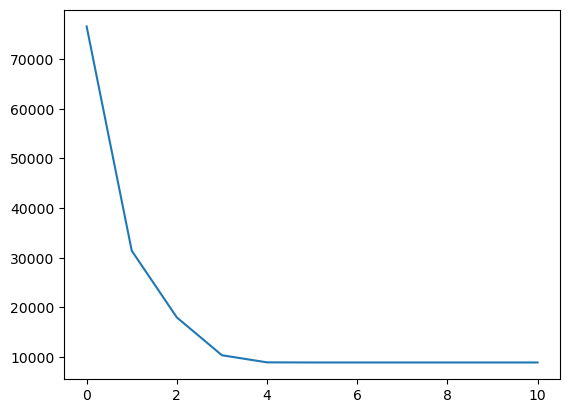

In [54]:
plt.plot(J);

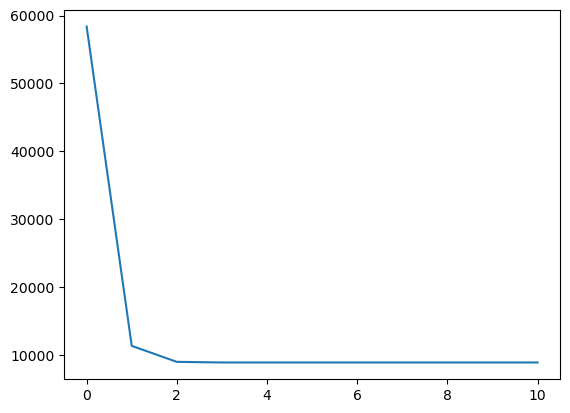

In [55]:
centers, J, closest = kmeans(data, 2, 10)
plt.plot(J);

In [56]:
centers

array([[ 4.29793023, 80.28488372],
       [ 2.09433   , 54.75      ]])

In [57]:
closest

array([0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 0])

array([[ 2.02314444, 53.61111111],
       [ 4.21205495, 79.44505495]])

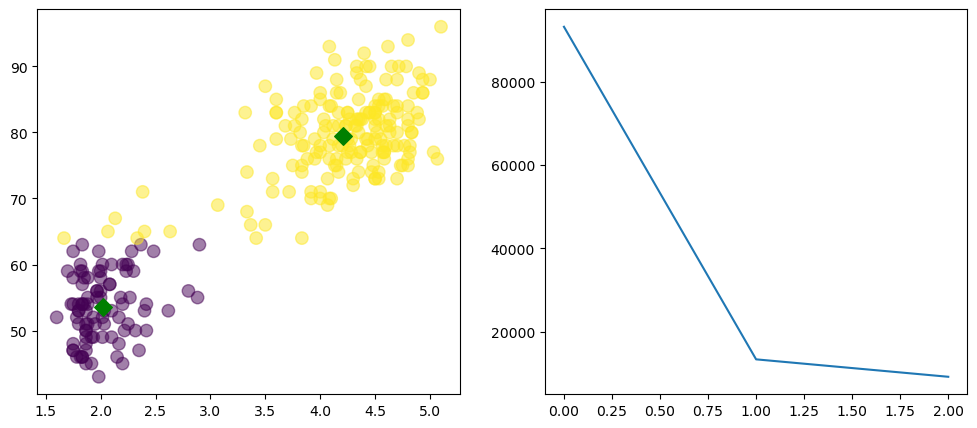

In [58]:
centers, J, closest = kmeans(data, 2, 2)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(data[:, 0], data[:, 1], s=80, c=closest, alpha=0.5)
plt.scatter(centers[:, 0], centers[:, 1], s=80, c="green", marker='D')

plt.subplot(1, 2, 2)
plt.plot(J)

centers

Let's try for more iterations.

array([[ 4.29793023, 80.28488372],
       [ 2.09433   , 54.75      ]])

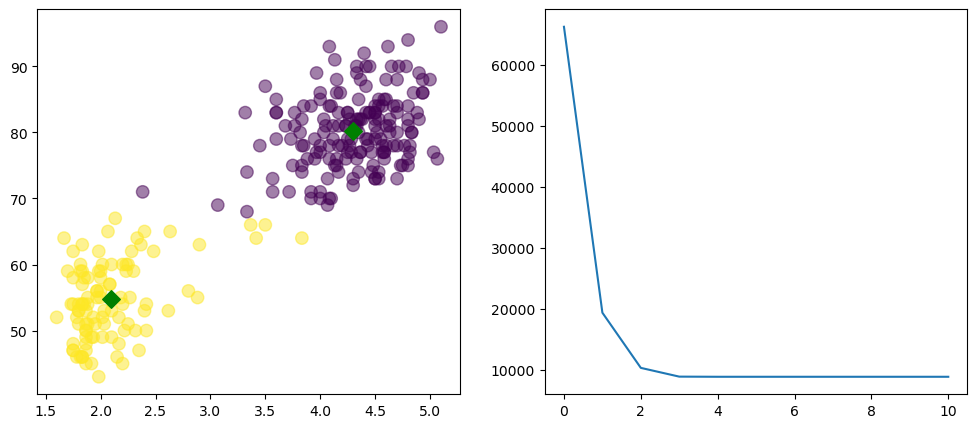

In [59]:
centers, J, closest = kmeans(data, 2, 10)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(data[:, 0], data[:, 1], s=80, c=closest, alpha=0.5)
plt.scatter(centers[:, 0], centers[:, 1], s=80, c="green", marker='D')

plt.subplot(1, 2, 2)
plt.plot(J)

centers

Now, how about three centers, so $k=3$?

array([[ 3.66606667, 70.65      ],
       [ 2.00583133, 52.86746988],
       [ 4.35836434, 82.6124031 ]])

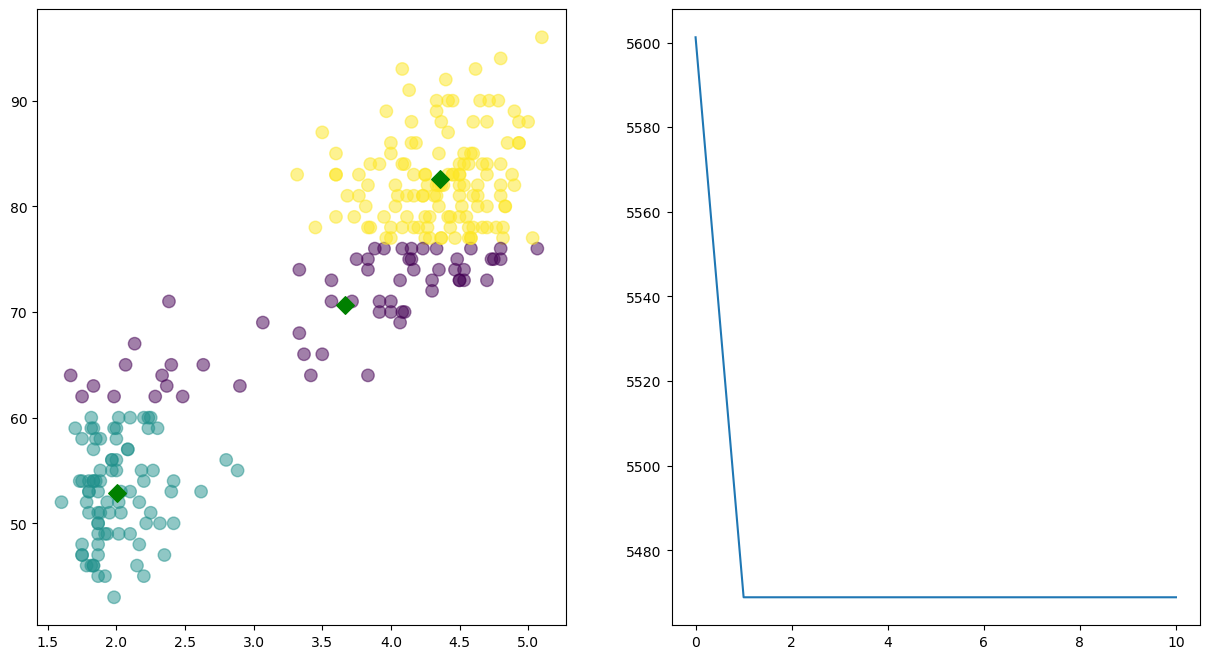

In [60]:
centers, J, closest = kmeans(data, 3, 10)

plt.figure(figsize=(15, 8))

plt.subplot(1, 2, 1)
plt.scatter(data[:, 0], data[:, 1], s=80, c=closest, alpha=0.5)
plt.scatter(centers[:, 0], centers[:, 1], s=80, c="green", marker='D')

plt.subplot(1, 2, 2)
plt.plot(J)

centers

array([[ 1.99635593, 50.6440678 ],
       [ 2.26145238, 60.83333333],
       [ 4.2403908 , 75.95402299],
       [ 4.3690119 , 84.91666667]])

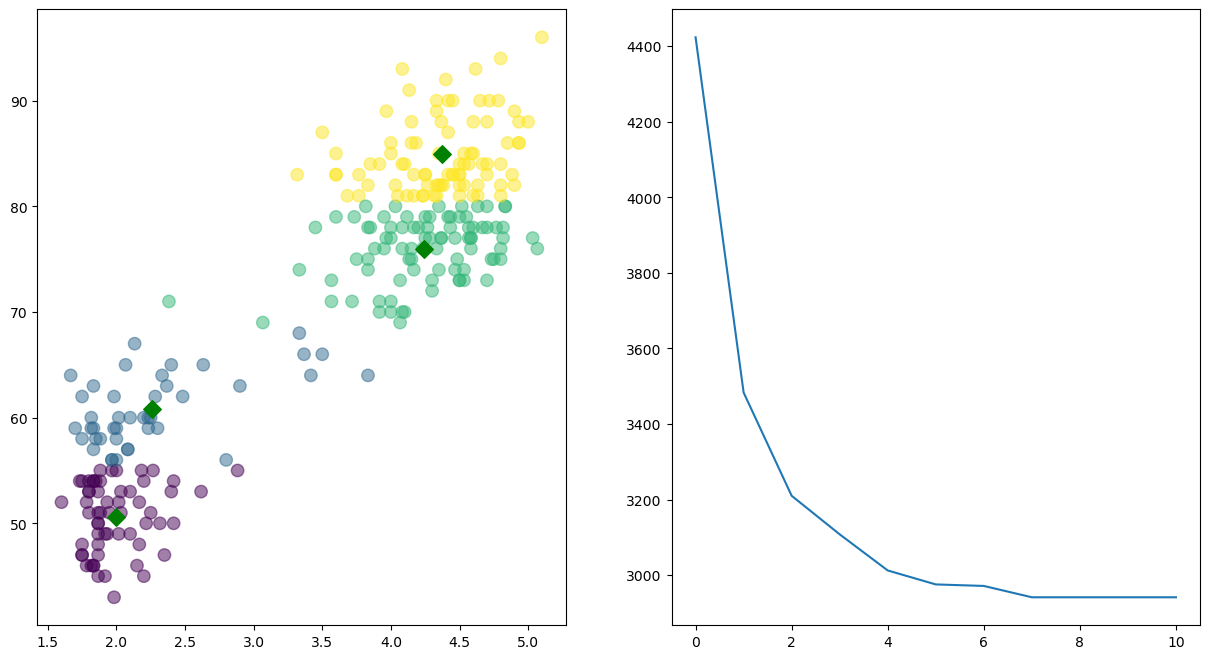

In [61]:
centers, J, closest = kmeans(data, 4, 10)

plt.figure(figsize=(15, 8))

plt.subplot(1, 2, 1)
plt.scatter(data[:, 0], data[:, 1], s=80, c=closest, alpha=0.5)
plt.scatter(centers[:, 0], centers[:, 1], s=80, c="green", marker='D')

plt.subplot(1, 2, 2)
plt.plot(J)

centers

Or six centers?

array([[ 4.29412281, 81.21052632],
       [ 4.347875  , 85.        ],
       [ 2.26965789, 61.34210526],
       [ 4.54438095, 90.19047619],
       [ 4.22268116, 75.04347826],
       [ 2.0082381 , 50.98412698]])

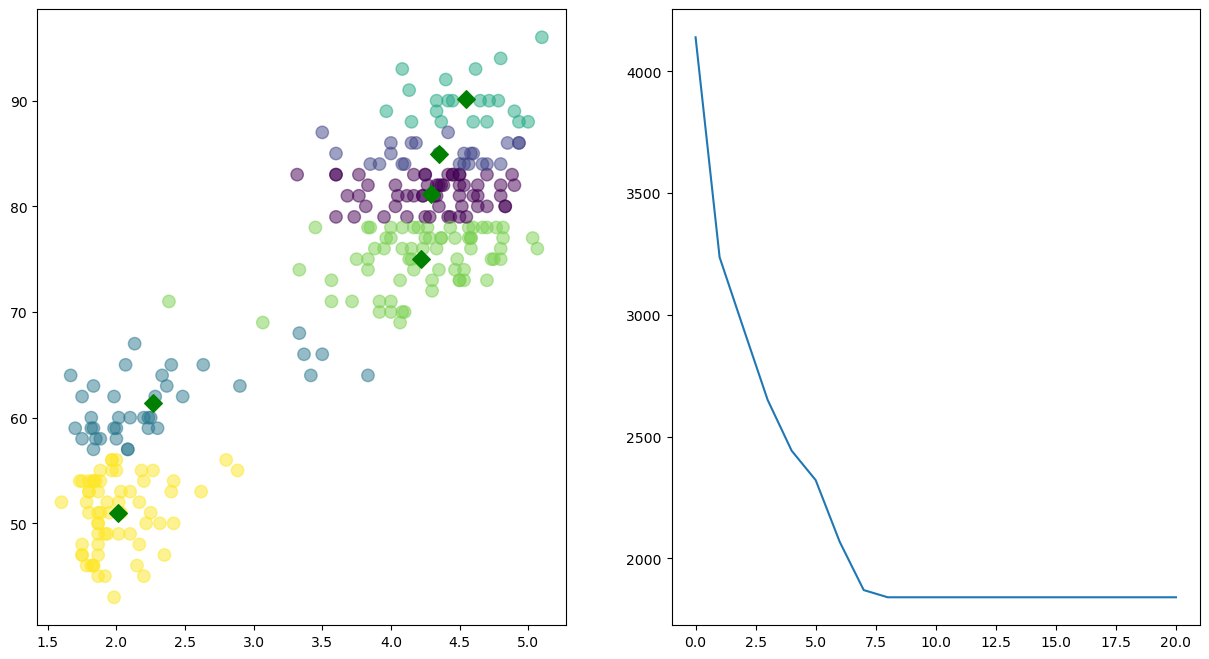

In [63]:
centers, J, closest = kmeans(data, 6, 20)

plt.figure(figsize=(15, 8))

plt.subplot(1, 2, 1)
plt.scatter(data[:, 0], data[:, 1], s=80, c=closest, alpha=0.5)
plt.scatter(centers[:, 0], centers[:, 1], s=80, c="green", marker='D')

plt.subplot(1, 2, 2)
plt.plot(J)

centers

## MNIST Dataset

So, clustering two-dimensional data is not all that exciting.  How about 784-dimensional data, such as our good buddy the MNIST data set?

In [64]:
import gzip
import pickle

with gzip.open('mnist.pkl.gz', 'rb') as f:
    train_set, valid_set, test_set = pickle.load(f, encoding='latin1')

Xtrain = train_set[0]
Ttrain = train_set[1].reshape((-1,1))

Xtest = test_set[0]
Ttest = test_set[1].reshape((-1,1))

Xtrain.shape, Ttrain.shape, Xtest.shape, Ttest.shape

((50000, 784), (50000, 1), (10000, 784), (10000, 1))

How many clusters shall we use?

In [65]:
centers, J, closest = kmeans(Xtrain, k=10, n_iterations=10)

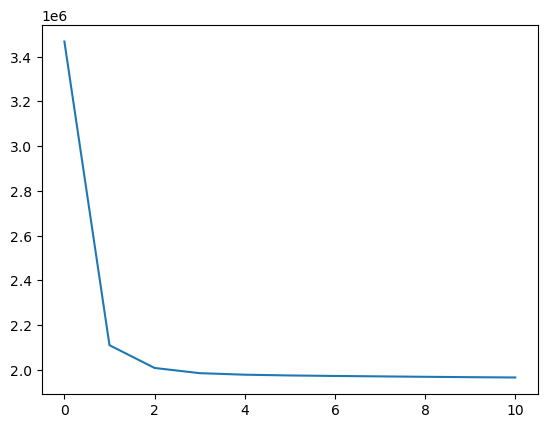

In [66]:
plt.plot(J);

In [67]:
centers.shape

(10, 784)

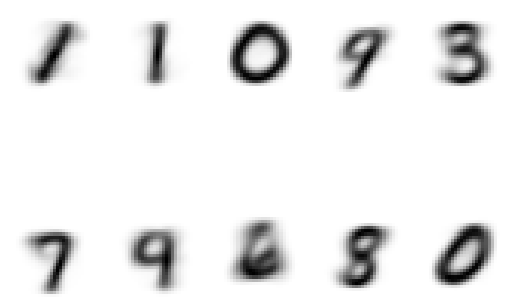

In [68]:
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(-centers[i, :].reshape((28, 28)), cmap='gray')
    plt.axis('off')

Try more iterations.

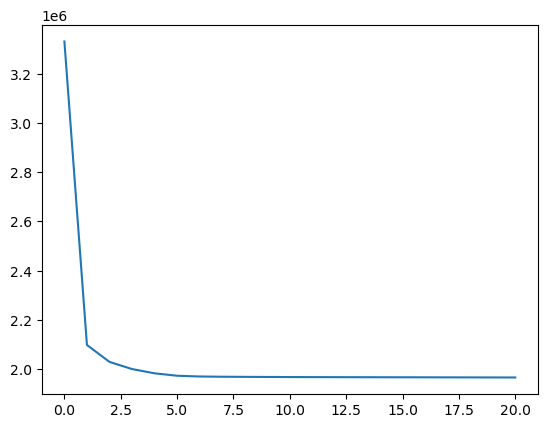

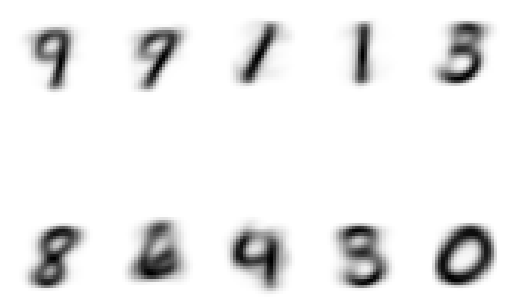

In [69]:
centers, J, closest = kmeans(Xtrain, k=10, n_iterations=20)
plt.plot(J)
plt.figure()
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(-centers[i, :].reshape((28, 28)), cmap='gray')
    plt.axis('off')

and more centers

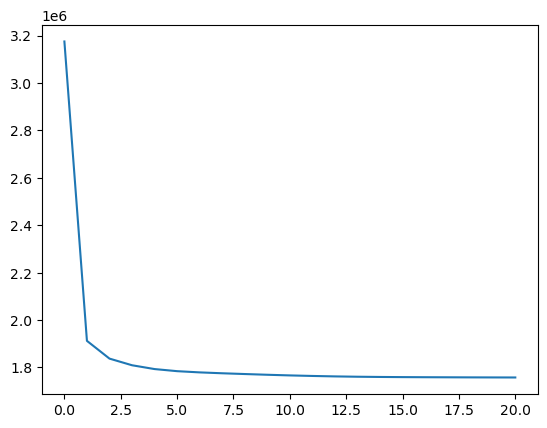

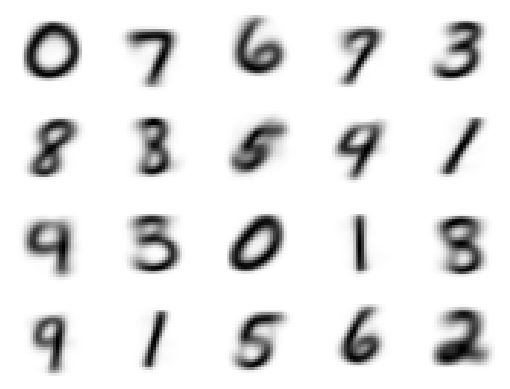

In [70]:
centers, J, closest = kmeans(Xtrain, k=20, n_iterations=20)
plt.plot(J)
plt.figure()
for i in range(20):
    plt.subplot(4, 5, i + 1)
    plt.imshow(-centers[i, :].reshape((28, 28)), interpolation='nearest', cmap='gray')
    plt.axis('off')

Try that again. Do the cluster centers differ?

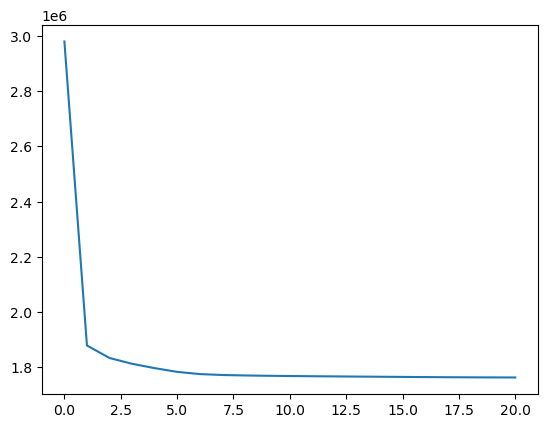

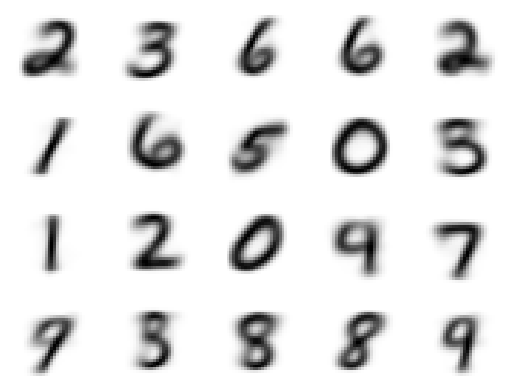

In [71]:
centers, J, closest = kmeans(Xtrain, k=20, n_iterations=20)
plt.plot(J)
plt.figure()
for i in range(20):
    plt.subplot(4, 5, i + 1)
    plt.imshow(-centers[i, :].reshape((28, 28)), interpolation='nearest', cmap='gray')
    plt.axis('off')

Maybe more clusters will help.  Do we see expected variations for each digit?

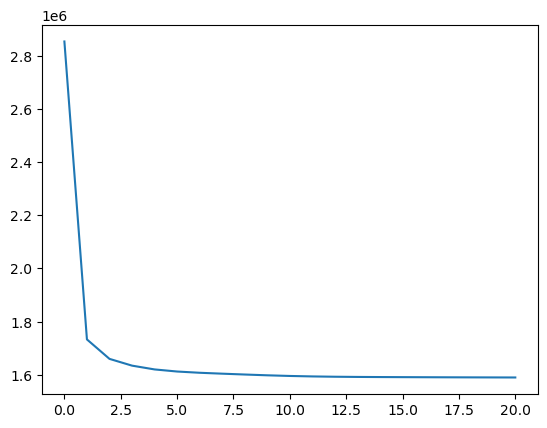

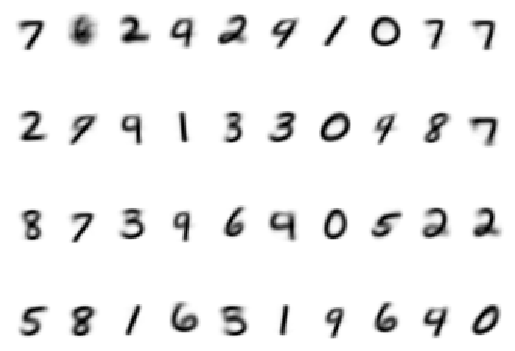

In [72]:
centers, J, closest = kmeans(Xtrain, k=40, n_iterations=20)
plt.plot(J)
plt.figure()
for i in range(40):
    plt.subplot(4, 10, i + 1)
    plt.imshow(-centers[i, :].reshape((28, 28)), interpolation='nearest', cmap='gray')
    plt.axis('off')

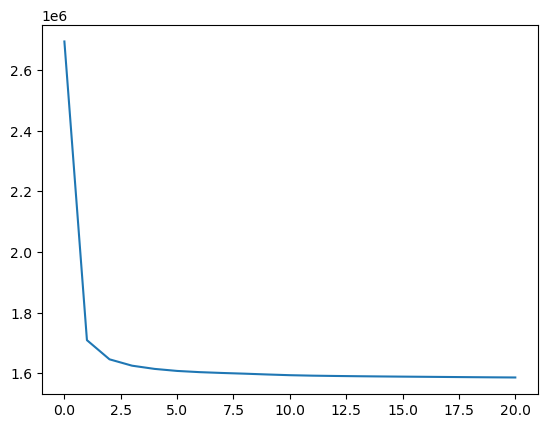

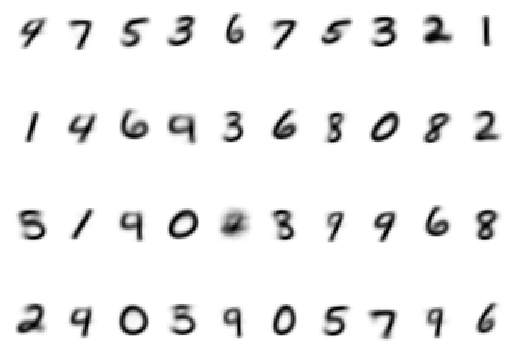

In [73]:
centers, J, closest = kmeans(Xtrain, k=40, n_iterations=20)
plt.plot(J)
plt.figure()
for i in range(40):
    plt.subplot(4, 10, i + 1)
    plt.imshow(-centers[i, :].reshape((28, 28)), interpolation='nearest', cmap='gray')
    plt.axis('off')

Humm. Some of these look pretty fuzzy.  Let's see how many samples are in each cluster.  Show the counts in the titles.

In [74]:
(closest == 0).sum()

1239

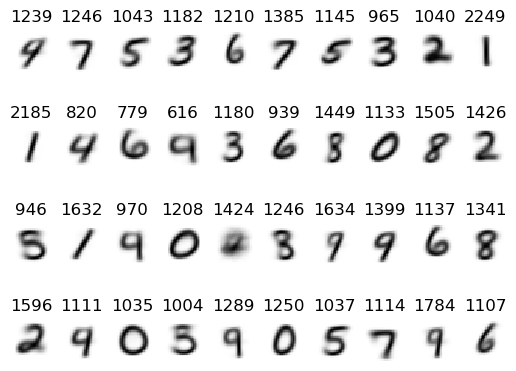

In [75]:
for i in range(40):
    plt.subplot(4, 10, i + 1)
    plt.imshow(-centers[i, :].reshape((28, 28)), interpolation='nearest', cmap='gray')
    plt.title(str((closest == i).sum()))
    plt.axis('off')

How could you use the results of the `kmeans` clustering algorithm as the first step in a classification algorithm?

# K-Nearest-Neighbor Classification

Now that we have some experience in calculating distances between samples, we are a short step away from an implementation of a common classification algorithm called *k-nearest-neighbor*.  This is a non-parametric algorithm, meaning that it does not involve parameters, like weights, to make its decisions.  Instead, we could call it a memory-based method. The algorithm classifies a sample by determining the $k$ closest samples in the training set and returns the most common class label among those $k$ nearest samples.

Training is terribly simple.  We just have to store the training samples.  Classification is also trivial to code.  We just calculate squared distances between training samples and the samples being classified and return the most common class label among the $k$ closest training samples.

Let's create a class named `KNN` to implement this algorithm.

First, let's practice our `numpy`-foo to see how to pick the most common class, with a minimum amount of code.

Remember that `sqdists` from above is `n_centers` x `n_samples`.

Let's try to classify the first three MNIST test samples.

In [76]:
sqdists = np.sum((Xtest[:3, np.newaxis, :] - Xtrain)**2, axis=2)
sqdists.shape

(3, 50000)

Okay. Now all we have to do is find the $k$ smallest distances in each row.  Let's use $k=5$.

In [77]:
k = 5
np.sort(sqdists[0, :])[:k]

array([ 9.6193695, 11.355759 , 11.403915 , 12.214478 , 12.627594 ],
      dtype=float32)

But, we need the indices of these values so we can look up their class labels in `T`.

In [78]:
k = 5
np.argsort(sqdists[0, :])[:k]

array([38620, 16186, 27059, 47003, 14563])

Now we have to do this for each row in `sqdists`.  Or do we?  Wouldn't it be nice if `np.argsort` sorts each row independently so we can do this in one function call?

In [79]:
np.sort(sqdists, axis=1)

array([[  9.6193695,  11.355759 ,  11.403915 , ..., 211.29517  ,
        211.7034   , 235.06609  ],
       [ 20.636139 ,  22.408554 ,  25.232117 , ..., 215.19962  ,
        216.1485   , 221.52444  ],
       [  1.6865845,   1.7748108,   2.063202 , ..., 227.82173  ,
        245.48021  , 251.6908   ]], dtype=float32)

Yippee!

In [80]:
np.argsort(sqdists, axis=1)

array([[38620, 16186, 27059, ..., 10259, 25321, 41358],
       [28882, 49160, 24612, ..., 43452, 10237, 13650],
       [46512, 15224, 47333, ..., 25321, 25285, 41358]])

In [81]:
indices = np.argsort(sqdists, axis=1)
indices

array([[38620, 16186, 27059, ..., 10259, 25321, 41358],
       [28882, 49160, 24612, ..., 43452, 10237, 13650],
       [46512, 15224, 47333, ..., 25321, 25285, 41358]])

In [82]:
np.squeeze(Ttrain[indices, :]).shape

(3, 50000)

(-0.5, 27.5, 27.5, -0.5)

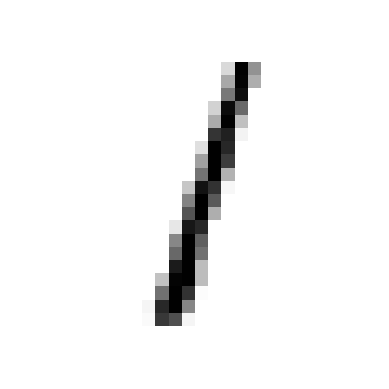

In [83]:
plt.imshow(-Xtest[2, :].reshape(28,28), cmap='gray')
plt.axis('off')

In [84]:
Ttrain[indices, :][:, :, 0]

array([[7, 7, 7, ..., 0, 8, 0],
       [2, 2, 2, ..., 4, 0, 4],
       [1, 1, 1, ..., 8, 0, 0]])

In [85]:
np.unique(Ttrain[indices, :][:, :, 0][:, :40], axis=1, return_counts=True)

(array([[7],
        [2],
        [1]]),
 array([40]))

Cool! Now we just have to take the first $k$ columns of these and determine the most common label across the columns, for each row.  We can use `scipy.stats.mode` for this!

In [86]:
import scipy.stats as ss
ss.mode([1, 2, 3, 4, 2, 2, 2])  #, keepdims=True)

ModeResult(mode=2, count=4)

In [87]:
ss.mode(Ttrain[indices, :][:, :, 0][:, :10], axis=1) #, keepdims=True)

ModeResult(mode=array([7, 2, 1]), count=array([10, 10, 10]))

In [88]:
Ttrain[indices, :][:, :, 0][:, :10]

array([[7, 7, 7, 7, 7, 7, 7, 7, 7, 7],
       [2, 2, 2, 2, 2, 2, 2, 2, 2, 2],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])

In [89]:
Ttest[:3]

array([[7],
       [2],
       [1]])

Well, maybe we will do better with different values of $k$.

Finally, we can now define our `KNN` class.

In [90]:
import numpy as np
import scipy.stats as ss  # for ss.mode

class KNN():
    
    def __init__(self):
        
        self.X = None  # data will be stored here
        self.T = None  # class labels will be stored here
        self.Xmeans = None
        self.Xstds = None
    
    def train(self, X, T):
        
        if self.Xmeans is None:
            self.Xmeans = X.mean(axis=0)
            self.Xstds = X.std(axis=0)
            self.Xstds[self.Xstds == 0] = 1
            
        self.X = self._standardizeX(X)
        self.T = T
        
    def _standardizeX(self, X):
        return (X - self.Xmeans) / self.Xstds

    def use(self, Xnew, k = 1):
        self.k = k
        # Calc squared distance from all samples in Xnew with all stored in self.X
        sqdists = np.sum( (self._standardizeX(Xnew)[:, np.newaxis, :] - self.X)**2, axis=-1 )

        # sqdists is now n_new_samples x n_train_samples
        # Sort each row of squared distances from smallest to largest and select the first k.
        indices = np.argsort(sqdists, axis=1)[:, :k]

        # Determine mose common class label in each row.
        classes = ss.mode(self.T[indices, :][:, :, 0], axis=1)[0]
        
        return classes

In [91]:
knn = KNN()
knn

Oh, can't have that!!

In [92]:
import numpy as np
import scipy.stats as ss  # for ss.mode

class KNN():
    
    def __init__(self):
        
        self.X = None  # data will be stored here
        self.T = None  # class labels will be stored here
        self.Xmeans = None
        self.Xstds = None
        
    def __repr__(self):
        
        if self.X is None:
            return f'KNN() has not been trained.'
        else:
            return f'KNN(), trained with {self.X.shape[0]} samples having class labels {np.unique(self.T)}.'
    
    def train(self, X, T):
        
        if self.Xmeans is None:
            self.Xmeans = X.mean(axis=0)
            self.Xstds = X.std(axis=0)
            self.Xstds[self.Xstds == 0] = 1
            
        self.X = self._standardizeX(X)
        self.T = T
        
        return self
        
    def _standardizeX(self, X):
        return (X - self.Xmeans) / self.Xstds

    def use(self, Xnew, k = 1):
        
        if self.X is None:
            raise Exception('KNN object has not been trained yet.')
            
        self.k = k
        # Calc squared distance from all samples in Xnew with all stored in self.X
        sqdists = np.sum( (self._standardizeX(Xnew)[:, np.newaxis, :] - self.X)**2, axis=-1 )
        # sqdist

        # sqdists is now n_new_samples x n_train_samples
        # Sort each row of squared distances from smallest to largest and select the first k.
        indices = np.argsort(sqdists, axis=1)[:, :k]

        # Determine mose common class label in each row.
        classes = ss.mode(self.T[indices, :][:, :, 0], axis=1)[0]
        
        return classes

In [93]:
knn = KNN()
knn

KNN() has not been trained.

In [94]:
knn.train(Xtrain, Ttrain)

KNN(), trained with 50000 samples having class labels [0 1 2 3 4 5 6 7 8 9].

Boy, that took a long time to train!  :)  200 ms.

Let's test it.  First, use the default value for $k$ of 1.

In [95]:
knn.use(Xtest[:3, :])

array([7, 2, 1])

In [96]:
Ttest[:3]

array([[7],
       [2],
       [1]])

Well, that worked perfectly. Let's try more test samples.

In [97]:
knn.use(Xtest[:10, :])

array([7, 2, 1, 0, 4, 1, 4, 4, 4, 9])

In [98]:
Ttest[:10]

array([[7],
       [2],
       [1],
       [0],
       [4],
       [1],
       [4],
       [9],
       [5],
       [9]])

There are some mistakes.  How about using more neighbors?

(-0.5, 27.5, 27.5, -0.5)

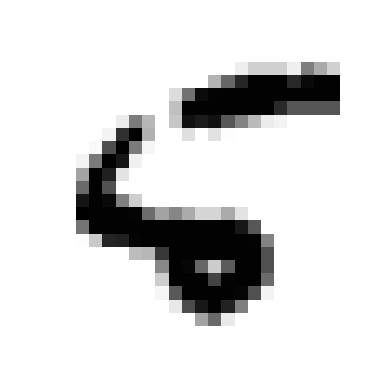

In [99]:
plt.imshow(-Xtest[8, :].reshape(28, 28), cmap='gray')
plt.axis('off')

In [100]:
knn.use(Xtest[:10, :], k=7)

array([7, 2, 1, 0, 4, 1, 4, 9, 4, 9])

In [101]:
Ttest[:10]

array([[7],
       [2],
       [1],
       [0],
       [4],
       [1],
       [4],
       [9],
       [5],
       [9]])

In [102]:
def percent_correct(Predicted, T):
    return 100 * np.mean(Predicted == T)

In [103]:
percent_correct(knn.use(Xtest[:10, :], k=5), Ttest[:10])

17.0

Now we can try multiple values of $k$ with a for loop, and test all test samples.

In [91]:
# pc = []
# for k in range(1, 5):
#     print(k, end=' ')
#     pc = percent_correct(knn.use(Xtest, k=k), Ttest)
#     pc.append([k, pc])

Python kernel died.

Well, here is what we often face when dealing with big data sets.  K-nearest-neighbors calculates squared distances between each train and test sample. That can get huge.  

We can deal with this the typical way of working with batches of data.

In [107]:
n_train = 5000  # To reduce computation time

knn = KNN()
knn.train(Xtrain[:n_train, :], Ttrain[:n_train, :])

batch_size = 500
n_samples = Xtest.shape[0]

results = []
for k in [1, 2, 5, 10, 20]:
    n_correct = 0
    for first in range(0, n_samples, batch_size):
        X = Xtest[first:first + batch_size, :]
        T = Ttest[first:first + batch_size, :]
        n_correct += np.sum(knn.use(X, k=k) == T.reshape(-1))
    pc = n_correct / n_samples * 100
    results.append([k, pc])
    print(results[-1])

[1, 89.18]
[2, 87.77000000000001]
[5, 89.17]
[10, 88.74]
[20, 87.39]


In [108]:
results

[[1, 89.18], [2, 87.77000000000001], [5, 89.17], [10, 88.74], [20, 87.39]]

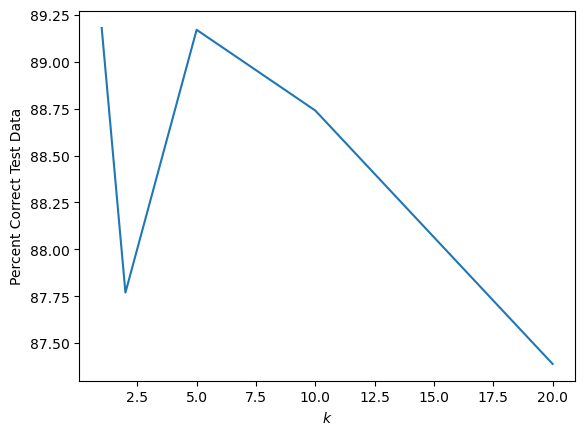

In [109]:
results = np.array(results)

plt.plot(results[:, 0], results[:, 1])
plt.xlabel('$k$')
plt.ylabel('Percent Correct Test Data');

How might you change the implementation of `KNN` to speed up this calculation using multiple $k$ values? 

How what might you change to speed up the calculations for a single $k$ value? (Hint: ever heard of a [kd-tree](https://johnlekberg.com/blog/2020-04-17-kd-tree.html))

How could you calculate class probabilities with `KNN`?

## Comparison to Neural Network Classifier

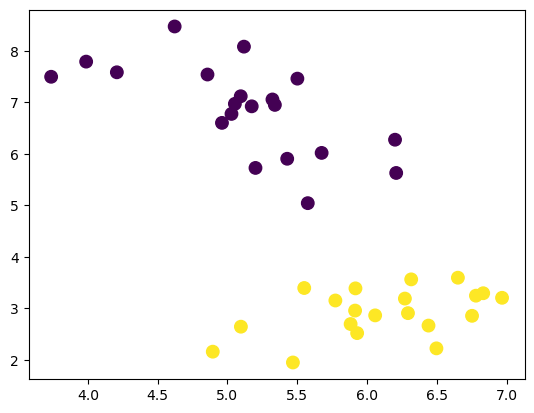

In [110]:
n = 20
X = np.random.multivariate_normal([5, 7], [[0.8, -0.5], [-0.5, 0.8]], n)
X = np.vstack((X,
               np.random.multivariate_normal([6, 3], [[0.6, 0.5], [0.5, 0.8]], n)))
T = np.vstack((np.ones((n, 1)), 2 * np.ones((n, 1))))


plt.scatter(X[:, 0], X[:, 1], c=T, s=80);

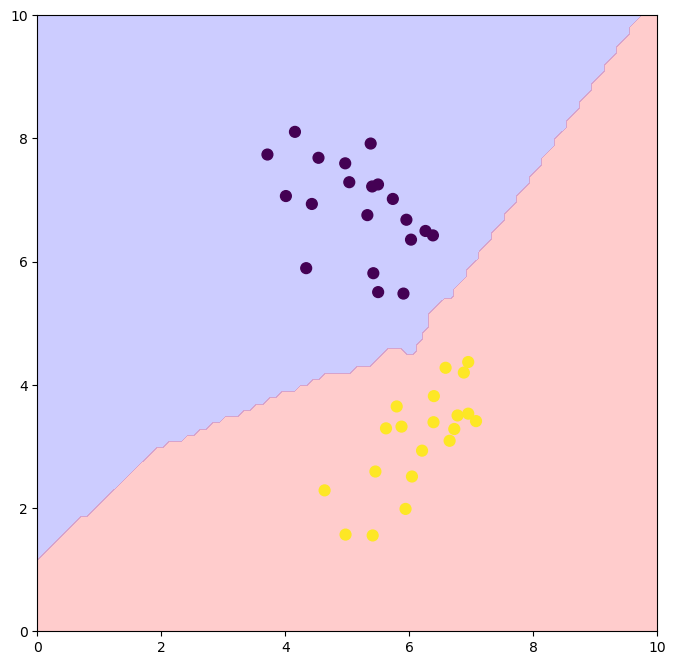

In [111]:
plt.figure(figsize=(8, 8))

n = 20
X = np.random.multivariate_normal([5, 7], [[0.8, -0.5], [-0.5, 0.8]], n)
X = np.vstack((X,
               np.random.multivariate_normal([6, 3], [[0.6, 0.5], [0.5, 0.8]], n)))
T = np.vstack((np.ones((n, 1)), 2 * np.ones((n, 1))))

# Make samples as coordinates of grid points across 2-dimensional data space
m = 100
xs = np.linspace(0, 10, m)
ys = xs
Xs, Ys = np.meshgrid(xs, ys)
samples = np.vstack((Xs.ravel(), Ys.ravel())).T

knn = KNN()
knn.train(X, T)

classes = knn.use(samples, k=1)
              
plt.contourf(Xs, Ys, classes.reshape(Xs.shape), 1, colors=('blue','red'), alpha=0.2)
plt.scatter(X[:, 0], X[:, 1], s=60, c=T);

Ooo, that's a cool plot.  Let's show similar plots for the classifiers we have studied so far, including LDA, QDA, k-NN, and neural nets.

In [112]:
def plot_result(X, Xs, Ys, classes):
    plt.contourf(Xs, Ys, classes.reshape(Xs.shape), 1, colors=('blue','red'), alpha=0.2)
    plt.scatter(X[:, 0], X[:, 1], s=60, c=T);

In [115]:
import neuralnetworksA4 as nn
import qdalda

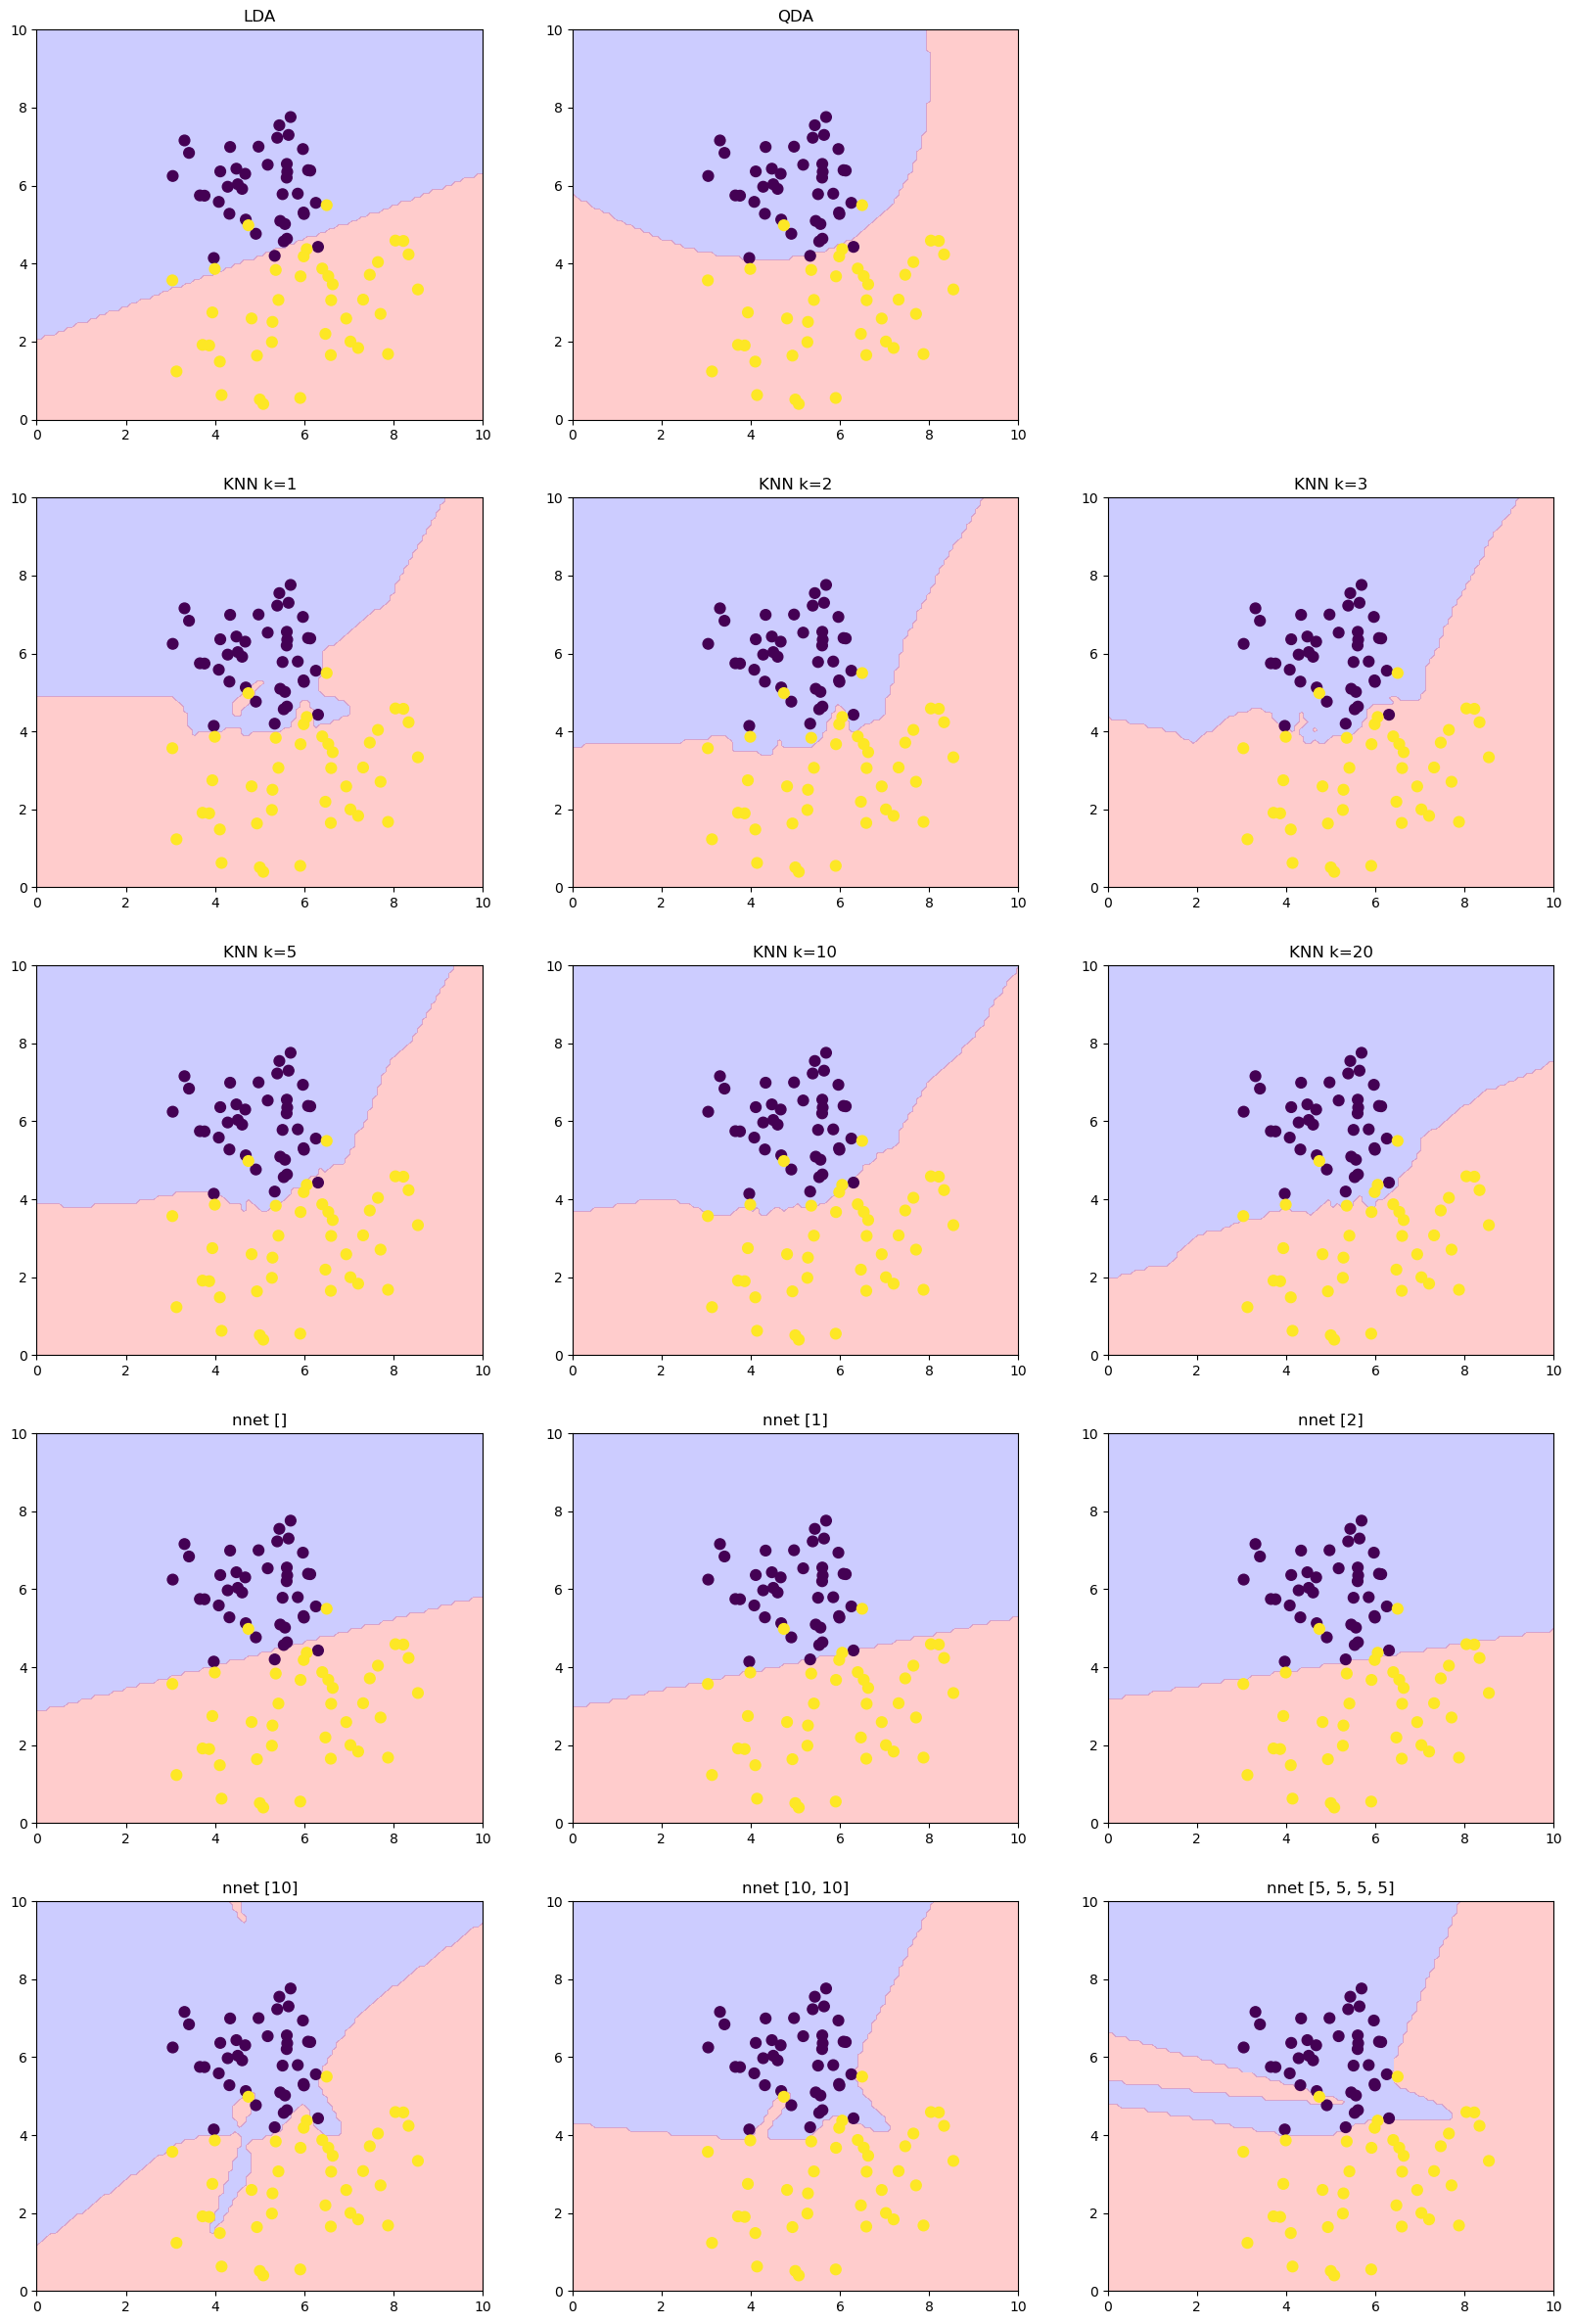

In [116]:
n = 40
X = np.random.multivariate_normal([5, 6], [[0.9, -0.2], [-0.2, 0.9]], n)
X = np.vstack((X,
               np.random.multivariate_normal([6, 3], [[2, 0.4], [0.4, 2]], n)))
T = np.vstack((np.ones((n, 1)), 2 * np.ones((n, 1))))


m = 100
xs = np.linspace(0, 10, m)           
ys = xs
Xs,Ys = np.meshgrid(xs, ys)
samples = np.vstack((Xs.ravel(), Ys.ravel())).T

plt.figure(figsize=(20, 30))

# Create and train Quadratic Discriminant Analysis (QDA)
# and Linear Discriminant Analysis (LDA) Classifiers
qda = qdalda.QDA()
qda.train(X, T)
lda = qdalda.LDA()
lda.train(X, T)

# Create and train k-nearest-neighbor (KNN) classifier
knn = KNN()
knn.train(X, T)
    
ploti = 0

# Use and plot results for LDA and QDA
ploti += 1
plt.subplot(5, 3, ploti)
classes = lda.use(samples)
plot_result(X, Xs, Ys, classes)
plt.title('LDA')

ploti += 1
plt.subplot(5, 3, ploti)
classes = qda.use(samples)
plot_result(X, Xs, Ys, classes)
plt.title('QDA')

ploti += 1
# Use and plot results for KNN with various values of k
for k in [1, 2, 3, 5, 10, 20]:
    ploti += 1
    plt.subplot(5, 3, ploti)
    classes = knn.use(samples, k)
    plot_result(X, Xs, Ys, classes)
    plt.title(f'KNN k={k}')

# Use and plot results for neural networks with various hidden layer structures
for n_hiddens in [[], [1], [2], [10], [10, 10], [5, 5, 5, 5]]:
    ploti += 1
    plt.subplot(5, 3, ploti)

    nnet = nn.NeuralNetworkClassifier(2, n_hiddens, 2)
    nnet.train(X, T, X, T, n_epochs=1000, method='scg', verbose=False)
    classes, _ = nnet.use(samples)
    plot_result(X, Xs, Ys, classes)
    plt.title(f'nnet {n_hiddens}')
